## 15.2 {qvalue} 패키지
### 예제 15.1

In [1]:
if(!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("qvalue")
library(qvalue)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.21), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion', 'qvalue'

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Old packages: 'bit', 'curl', 'dbplyr', 'devtools', 'digest', 'gert', 'highr',
  'isoband', 'pkgload', 'readxl', 'roxygen2', 'rstudioapi', 'testthat',
  'tidyverse', 'whisker', 'xml2', 'boot', 'foreign', 'KernSmooth', 'Matrix',
  'mgcv'



In [2]:
data(hedenfalk)
str(hedenfalk)

List of 3
 $ p    : num [1:3170] 0.0121 0.075 0.9949 0.0418 0.8458 ...
 $ stat : num [1:3170] 2.825 1.888 0.006 2.199 0.195 ...
 $ stat0: num [1:3170, 1:100] 0.501 0.224 1.262 0.245 0.662 ...


In [3]:
p = hedenfalk$p
qobj = qvalue(p)
summary(qobj)


Call:
qvalue(p = p)

pi0:	0.669926	

Cumulative number of significant calls:

          <1e-04 <0.001 <0.01 <0.025 <0.05 <0.1   <1
p-value       15     76   265    424   605  868 3170
q-value        0      0     1     73   162  319 3170
local FDR      0      0     3     30    85  167 2241



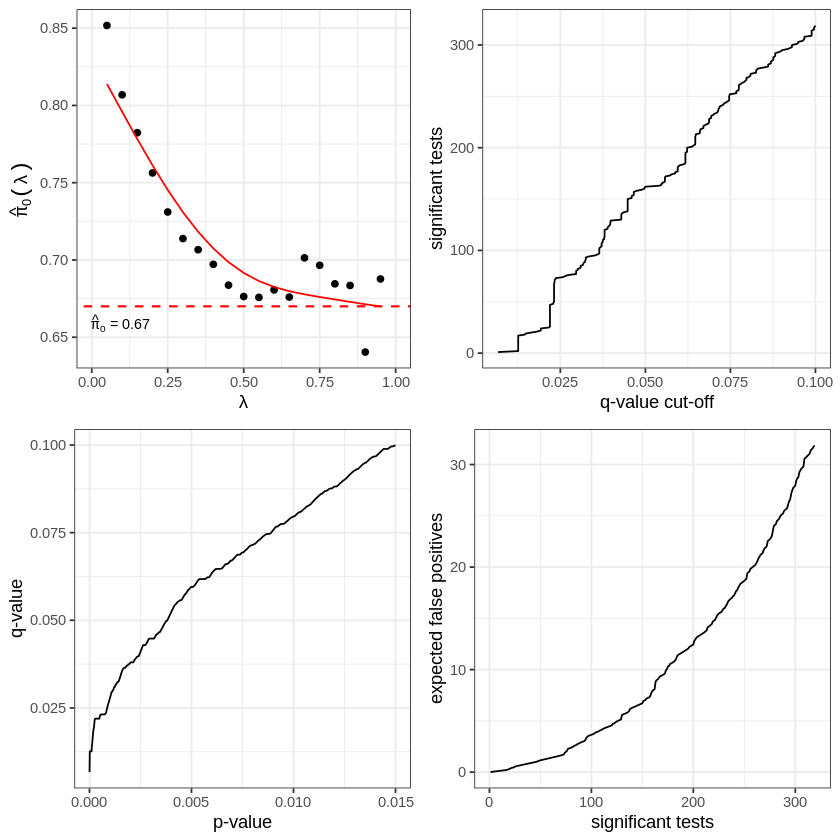

In [4]:
plot(qobj)

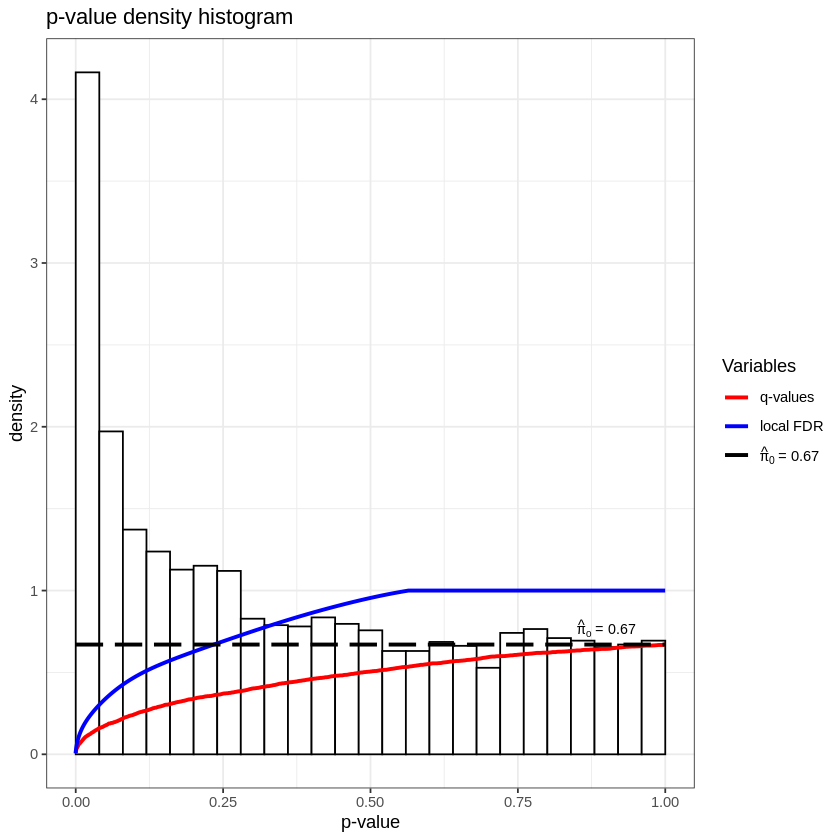

In [5]:
hist(qobj)

In [6]:
qobj = qvalue(p, lambda = 0.5, pfdr = TRUE)
summary(qobj)


Call:
qvalue(p = p, pfdr = TRUE, lambda = 0.5)

pi0:	0.6763407	

Cumulative number of significant calls:

          <1e-04 <0.001 <0.01 <0.025 <0.05 <0.1   <1
p-value       15     76   265    424   605  868 3170
q-value        0      0     0      0   159  314 3170
local FDR      0      0     3     29    85  166 2203



In [7]:
qobj = qvalue(p, fdr.level = 0.05, pi0.method = "bootstrap", adj = 1.2)
summary(qobj)


Call:
qvalue(p = p, fdr.level = 0.05, pi0.method = "bootstrap", adj = 1.2)

pi0:	0.6763407	

Cumulative number of significant calls:

          <1e-04 <0.001 <0.01 <0.025 <0.05 <0.1   <1
p-value       15     76   265    424   605  868 3170
q-value        0      0     1     73   159  314 3170
local FDR      0      0     1     27    83  163 2209



In [8]:
obs_stats = hedenfalk$stat
null_stats = hedenfalk$stat0
pvalues = empPvals(stat = obs_stats, stat0 = null_stats)
qobj = qvalue(p = pvalues)

## 15.3 {fdrtool} 패키지
### 예제 15.2

In [9]:
install.packages("fdrtool")
library(fdrtool)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
data(pvalues)
str(pvalues)

 num [1:4289] 0.3987 0.9172 0.012 0.011 0.0735 ...


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



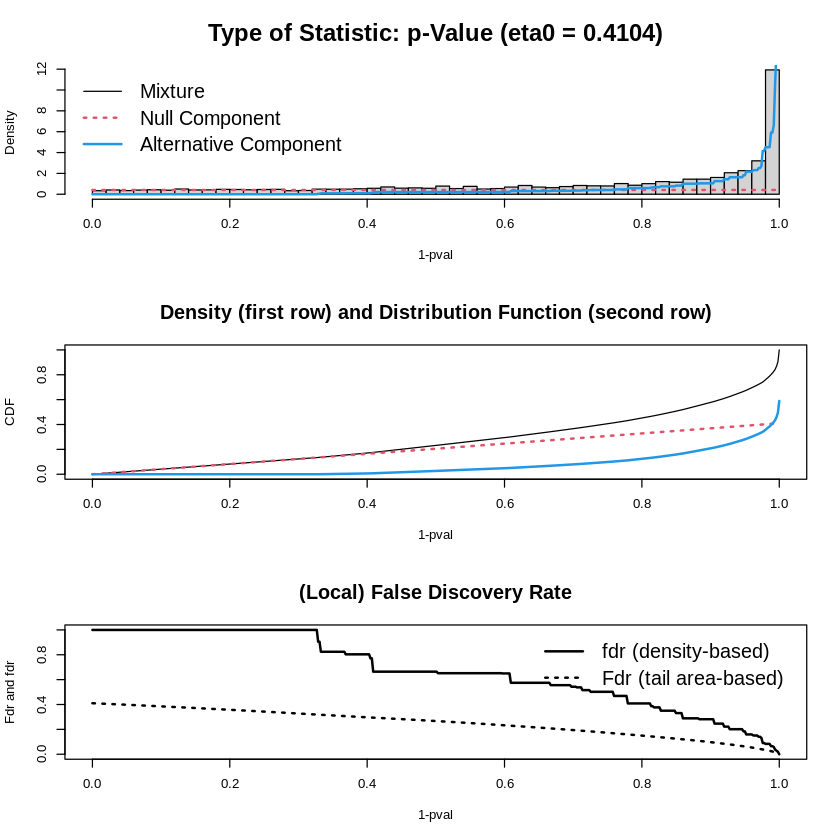

In [11]:
fdr = fdrtool(pvalues, statistic = "pvalue", color.figure = TRUE)

In [12]:
head(fdr$pval)

[1] 0.39866991 0.91717081 0.01198907 0.01098668 0.07347634 0.44358099

In [13]:
head(fdr$qval)

[1] 0.23228811 0.38964493 0.02475281 0.02343057 0.07987291 0.24847897

In [14]:
head(fdr$lfdr)

[1] 0.64992700 1.00000000 0.06488683 0.06488683 0.22217161 0.65197229

In [15]:
fdr$param

cutoff,N.cens,eta0,eta0.SE
0.6767363,569,0.4103924,0.01602273


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



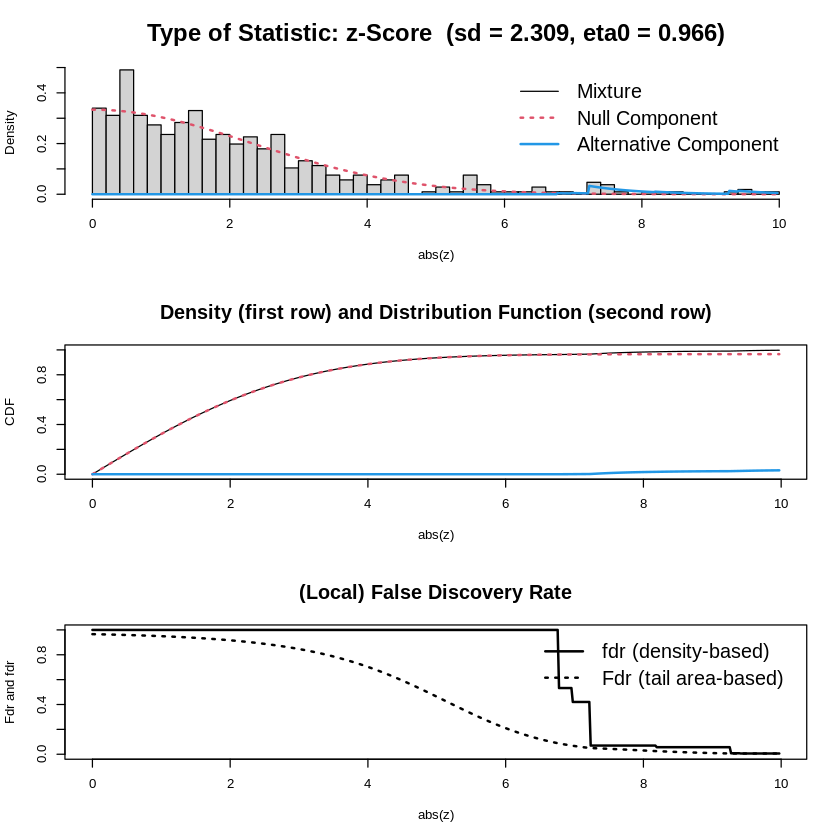

In [16]:
sd.true = 2.232
n = 500
z = rnorm(n, sd = sd.true)
z = c(z, runif(30, 5, 10))
fdr = fdrtool(z, plot = TRUE)

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



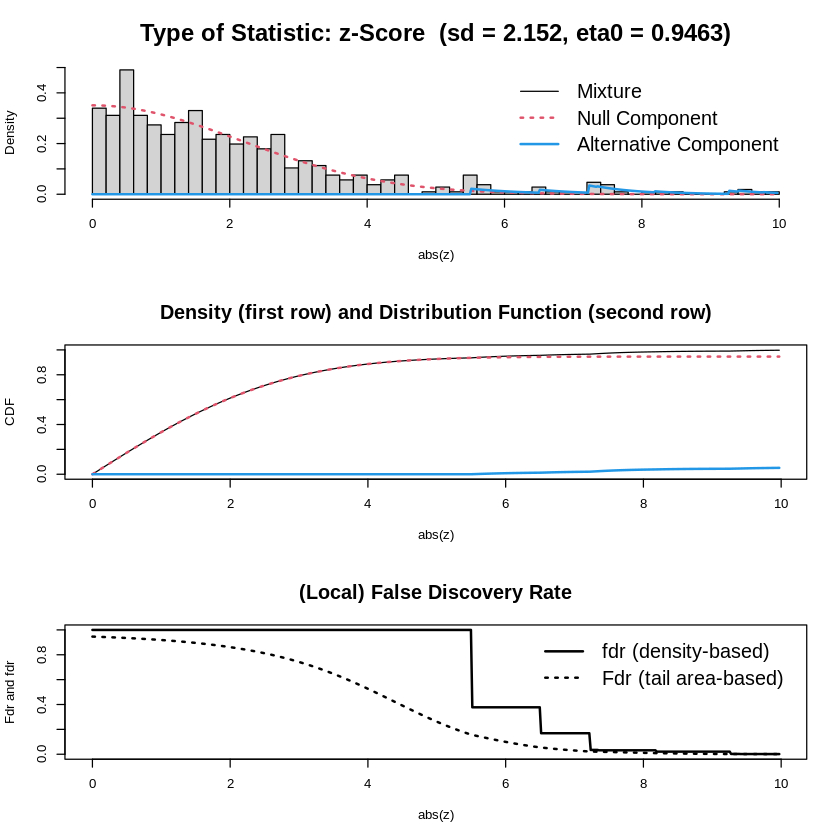

In [17]:
fdr = fdrtool(z, plot = TRUE, cutoff.method = "pct0", pct0 = 0.9)

Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



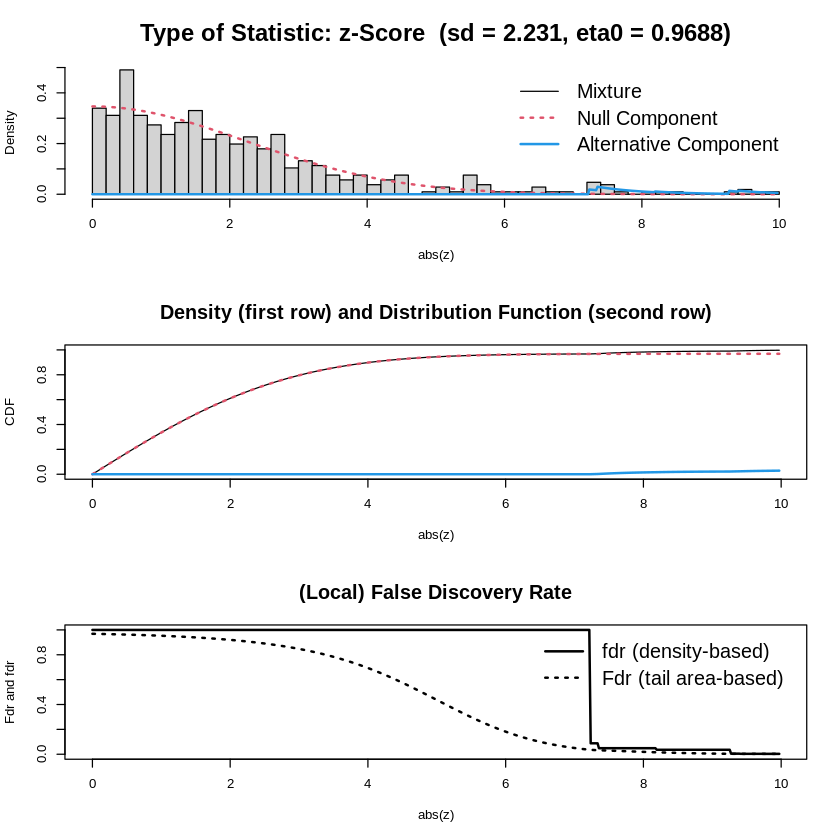

In [18]:
fdr = fdrtool(z, plot = TRUE, cutoff.method = "pct0", pct0 = 0.8)

## 15.4 {twilight} 패키지

In [19]:
if(!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c("golubEsets", "vsn", "twilight"))
library(golubEsets)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.21), R 4.3.1 (2023-06-16)

Installing package(s) 'golubEsets', 'vsn', 'twilight'

also installing the dependencies ‘BiocGenerics’, ‘affyio’, ‘preprocessCore’, ‘zlibbioc’, ‘Biobase’, ‘affy’, ‘limma’


Old packages: 'bit', 'curl', 'dbplyr', 'devtools', 'digest', 'gert', 'highr',
  'isoband', 'pkgload', 'readxl', 'roxygen2', 'rstudioapi', 'testthat',
  'tidyverse', 'whisker', 'xml2', 'boot', 'foreign', 'KernSmooth', 'Matrix',
  'mgcv'

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    co

In [20]:
data(Golub_Train)
Golub_Train

ExpressionSet (storageMode: lockedEnvironment)
assayData: 7129 features, 38 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 1 2 ... 33 (38 total)
  varLabels: Samples ALL.AML ... Source (11 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 10521349 
Annotation: hu6800 

In [21]:
install.packages("vsn")
library(vsn)
golubNorm = justvsn(Golub_Train)
Golub_Train$ALL.AML

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘vsn’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


[1] ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL ALL
[20] ALL ALL ALL ALL ALL ALL ALL ALL AML AML AML AML AML AML AML AML AML AML AML
Levels: ALL AML

In [22]:
id = as.numeric(Golub_Train$ALL.AML)
id

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2

In [23]:
install.packages("twilight")
library(twilight)
pval = twilight.pval(golubNorm, id, B = 100)
pval

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘twilight’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Loading required package: splines



No complete enumeration. Prepare permutation matrix. 
Compute vector of observed statistics. 
Compute expected scores and p-values. This will take approx. 1 seconds. 
Compute q-values. 
Compute values for confidence lines. 



 Twilight object with
     7129 transcripts
     observed and expected test statistics
     p- and q-values

 Estimated percentage of non-induced genes:
      pi0 
0.6743975 

 Function call:
 Test: fc. Paired: FALSE. Number of permutations: 100. Balanced: FALSE. 

In [24]:
data(expval)

In [25]:
expval


 Twilight object with
     7129 transcripts
     observed and expected test statistics
     p- and q-values

 Estimated percentage of non-induced genes:
     pi0 
0.619148 

 Function call:
 Test: fc. Paired: FALSE. Number of permutations: 1000. Balanced: FALSE. 

In [26]:
names(expval)

[1] "result"   "s0"       "ci.line"  "quant.ci" "lambda"   "pi0"     
 [7] "boot.pi0" "boot.ci"  "effect"   "call"

In [27]:
names(expval$result)

[1] "observed"  "expected"  "candidate" "pvalue"    "qvalue"    "fdr"      
 [7] "mean.fdr"  "lower.fdr" "upper.fdr" "index"

In [28]:
expval$result[1:7, ]

,observed,expected,candidate,pvalue,qvalue,fdr,mean.fdr,lower.fdr,upper.fdr,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
M84526_at,3.990578,1.1091753,1,1.402721e-07,0.000619148,NaN,NaN,NaN,NaN,2288
M27891_at,3.669657,0.9709790,1,2.805443e-07,0.000619148,NaN,NaN,NaN,NaN,1882
M89957_at,-3.153319,-1.1007286,1,4.208164e-07,0.000619148,NaN,NaN,NaN,NaN,2335
X82240_rna1_at,-3.111376,-0.9651917,1,5.610885e-07,0.000619148,NaN,NaN,NaN,NaN,4680
U89922_s_at,-2.954233,-0.8979189,1,7.013606e-07,0.000619148,NaN,NaN,NaN,NaN,6049
M19507_at,2.925666,0.8936237,1,8.416328e-07,0.000619148,NaN,NaN,NaN,NaN,1779
M11722_at,-2.689999,-0.8471725,1,9.819049e-07,0.000619148,NaN,NaN,NaN,NaN,1685


In [29]:
expval$pi0

[1] 0.619148

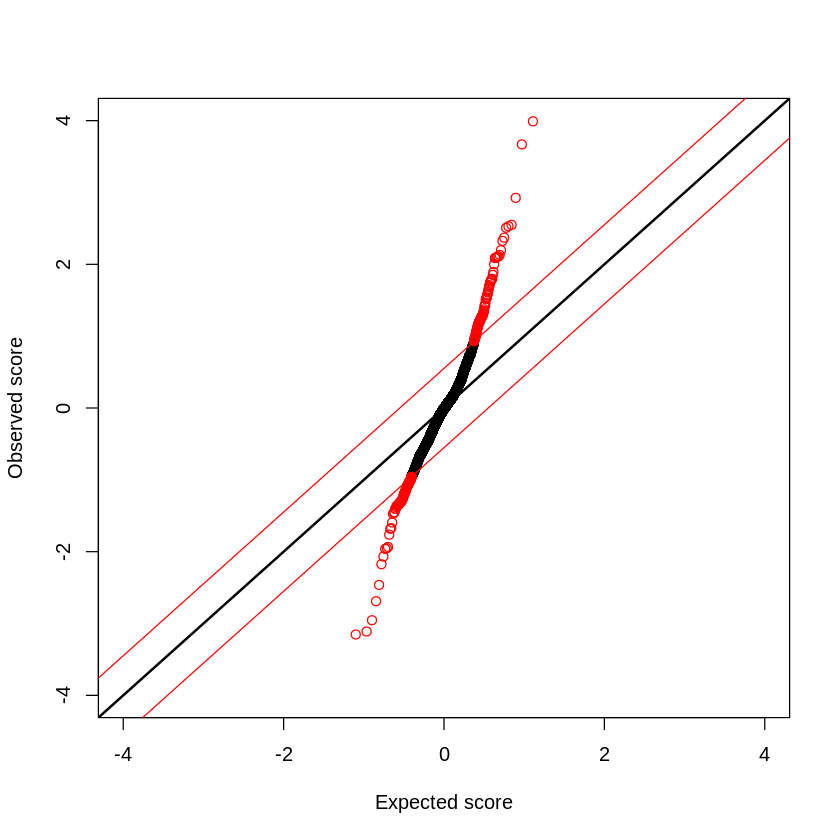

In [30]:
plot(expval, which = "scores", grayscale = F, legend = F)

### 예제 15.4

In [31]:
gene = exprs(golubNorm)[pval$result$index[1],]
corr = twilight.pval(golubNorm, gene, method = "spearman", quant.ci = 0.99, B = 100)
corr

Compute vector of observed statistics. 
Compute expected scores and p-values. This will take approx. 0 seconds. 
Compute q-values. 
Compute values for confidence lines. 



 Twilight object with
     7129 transcripts
     observed and expected test statistics
     p- and q-values

 Estimated percentage of non-induced genes:
      pi0 
0.6367975 

 Function call:
 Test: spearman. Number of permutations: 100. 

In [32]:
corr$result[1:10, ]

,observed,expected,candidate,pvalue,qvalue,fdr,mean.fdr,lower.fdr,upper.fdr,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
M27891_at,1.0000000,0.5726163,1,1.402721e-06,0.006367975,NaN,NaN,NaN,NaN,1882
J03801_f_at,0.7901302,0.5363256,1,2.805443e-06,0.006367975,NaN,NaN,NaN,NaN,6797
D88422_at,0.7850968,0.5202889,1,4.208164e-06,0.006367975,NaN,NaN,NaN,NaN,760
Z15115_at,-0.7577415,-0.5732049,1,5.610885e-06,0.006367975,NaN,NaN,NaN,NaN,5501
M83667_rna1_s_at,0.7566473,0.5089178,1,7.013606e-06,0.006367975,NaN,NaN,NaN,NaN,6378
M19045_f_at,0.7557720,0.5008075,1,8.416328e-06,0.006367975,NaN,NaN,NaN,NaN,6803
M33195_at,0.7481125,0.4929445,1,9.819049e-06,0.006367975,NaN,NaN,NaN,NaN,1953
X64072_s_at,0.7474560,0.4870380,1,1.122177e-05,0.006367975,NaN,NaN,NaN,NaN,6185
U22376_cds2_s_at,-0.7457052,-0.5373914,1,1.262449e-05,0.006367975,NaN,NaN,NaN,NaN,5772


In [33]:
yperm = twilight.filtering(golubNorm, id, method = "fc", num.perm = 50, num.take = 10)
dim(yperm)

Filtering: Wait for 5 to 15 dots .....done


[1] 50 38

Compute vector of observed statistics. 
Compute expected scores and p-values. This will take approx. 0 seconds. 
Compute q-values. 
Compute values for confidence lines. 


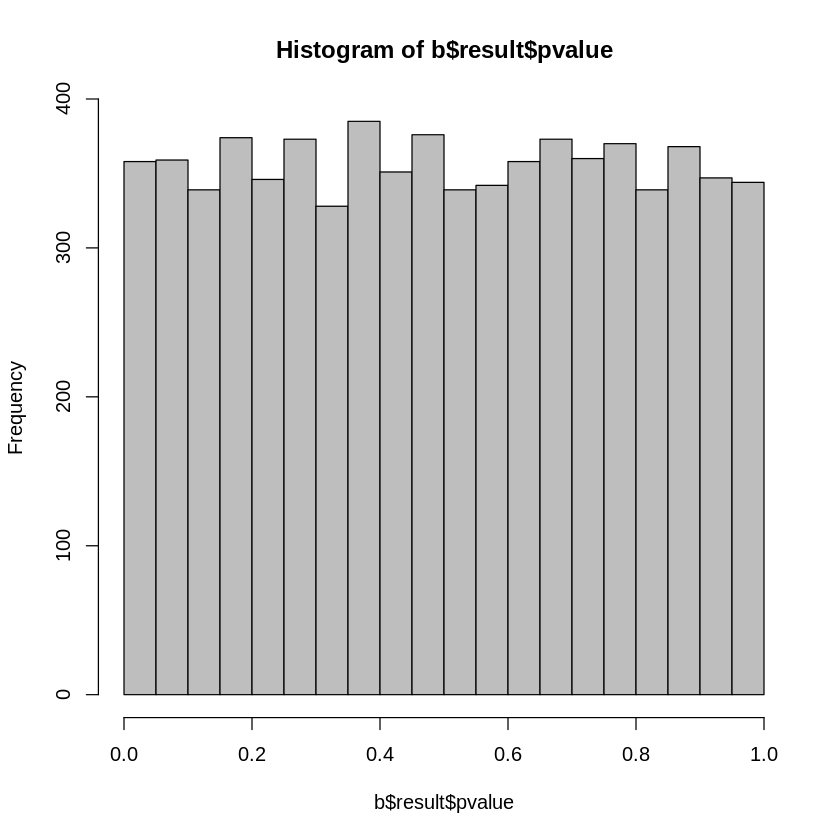

In [34]:
yperm = yperm[-1, ]
b = twilight.pval(golubNorm, yperm[1, ], method = "fc", yperm = yperm)
hist(b$result$pvalue, col = "gray", br = 20)

In [35]:
data(exfdr)
exfdr


 Twilight object with
     7129 transcripts
     observed and expected test statistics
     p- and q-values
     local FDR
     bootstrap estimates of local FDR

 Bootstrap estimate of percentage of non-induced
 genes with lower and upper 95% CI:
       pi0 lower.pi0 upper.pi0
 0.6263987   0.59279 0.6568944

 Function call:
 Test: fc. Paired: FALSE. Number of permutations: 1000. Balanced: FALSE. 
 Function twilight used lambda = 0.02 

In [36]:
exfdr$result[1:5, 6:9]

,fdr,mean.fdr,lower.fdr,upper.fdr
,<dbl>,<dbl>,<dbl>,<dbl>
M84526_at,0.01024130,0.01015424,0.007309932,0.01307063
M27891_at,0.01024240,0.01015535,0.007311074,0.01307174
M89957_at,0.01024351,0.01015646,0.007312216,0.01307286
X82240_rna1_at,0.01024461,0.01015756,0.007313358,0.01307398
U89922_s_at,0.01024571,0.01015867,0.007314500,0.01307509


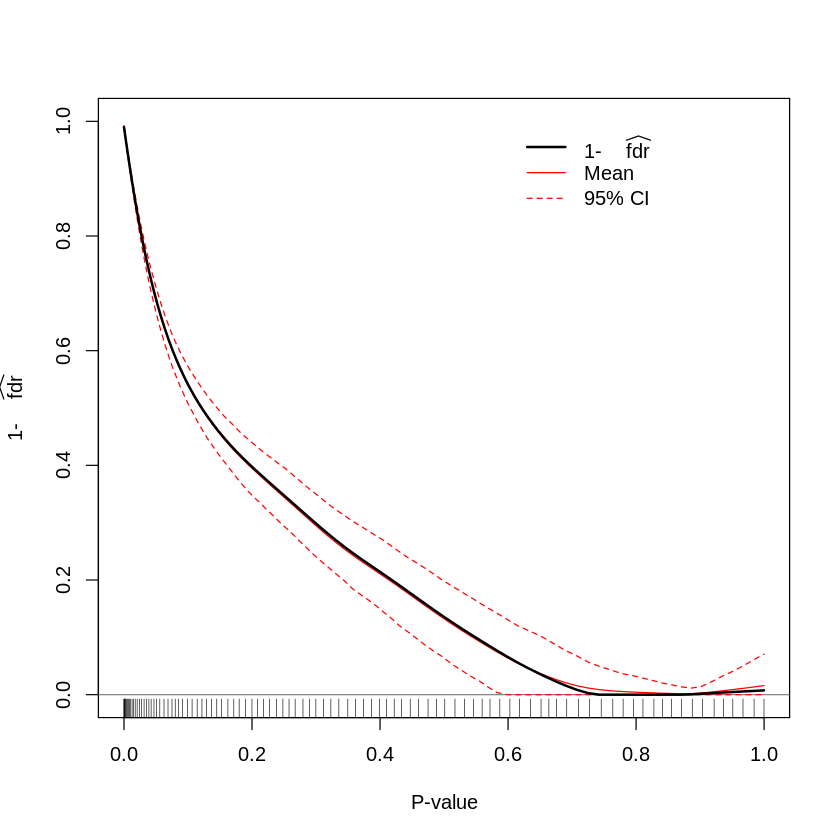

In [37]:
plot(exfdr, which = "fdr", grayscale = F, legend = T)

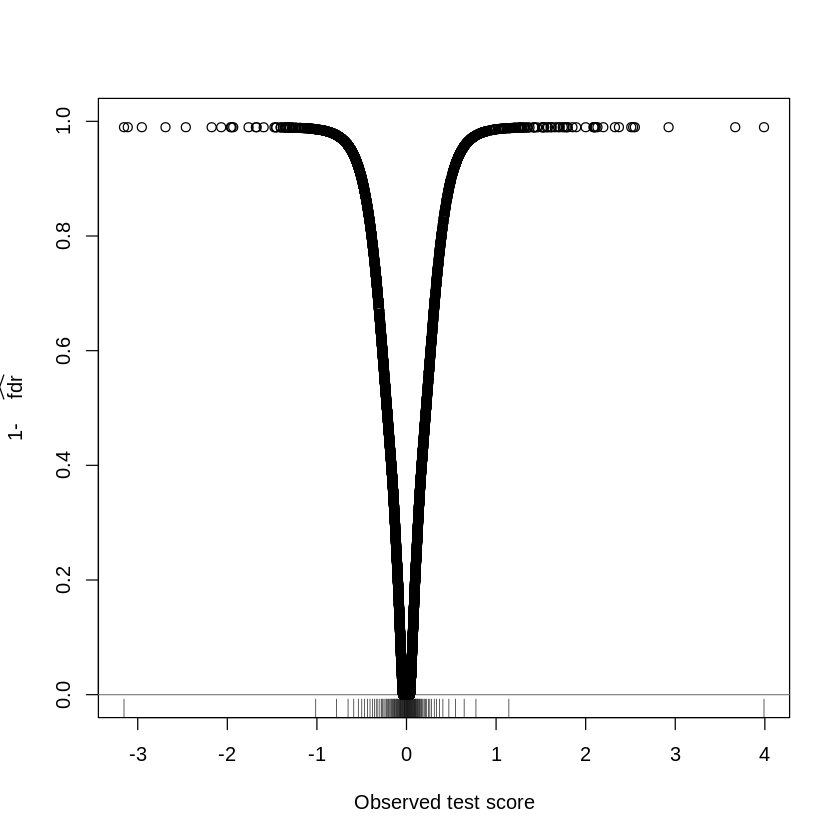

In [38]:
plot(exfdr, which = "volcano")

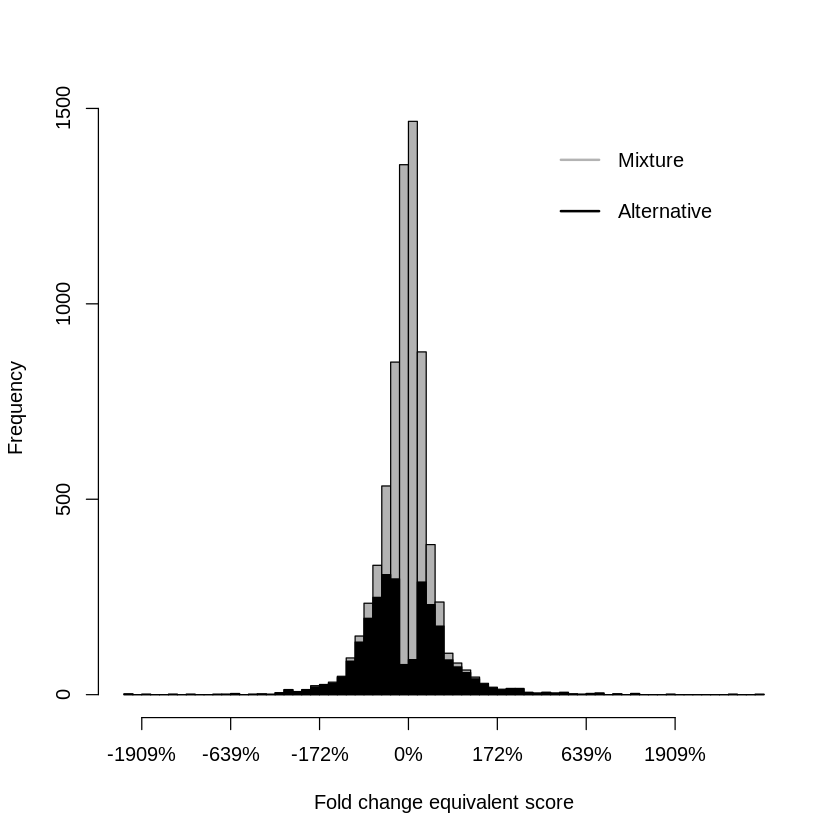

In [39]:
plot(exfdr, which = "effectsize", legend = T)

In [40]:
tab = plot(exfdr, which = "table")
tab[1:8, ]

,LogRatio,Mixture,Alternative
-2234%,-3.15,2,1.6
-2012%,-3.05,0,0.0
-1811%,-2.95,1,1.0
-1629%,-2.85,0,0.0
-1464%,-2.75,0,0.0
-1315%,-2.65,1,1.0
-1181%,-2.55,0,0.0
-1059%,-2.45,1,1.0


### 예제 15.5

In [41]:
yperm = twilight.filtering(golubNorm, id, method = "fc", num.perm = 50, num.take = 10)
dim(yperm)

Filtering: Wait for 5 to 15 dots .....done


[1] 50 38

Compute vector of observed statistics. 
Compute expected scores and p-values. This will take approx. 0 seconds. 
Compute q-values. 
Compute values for confidence lines. 


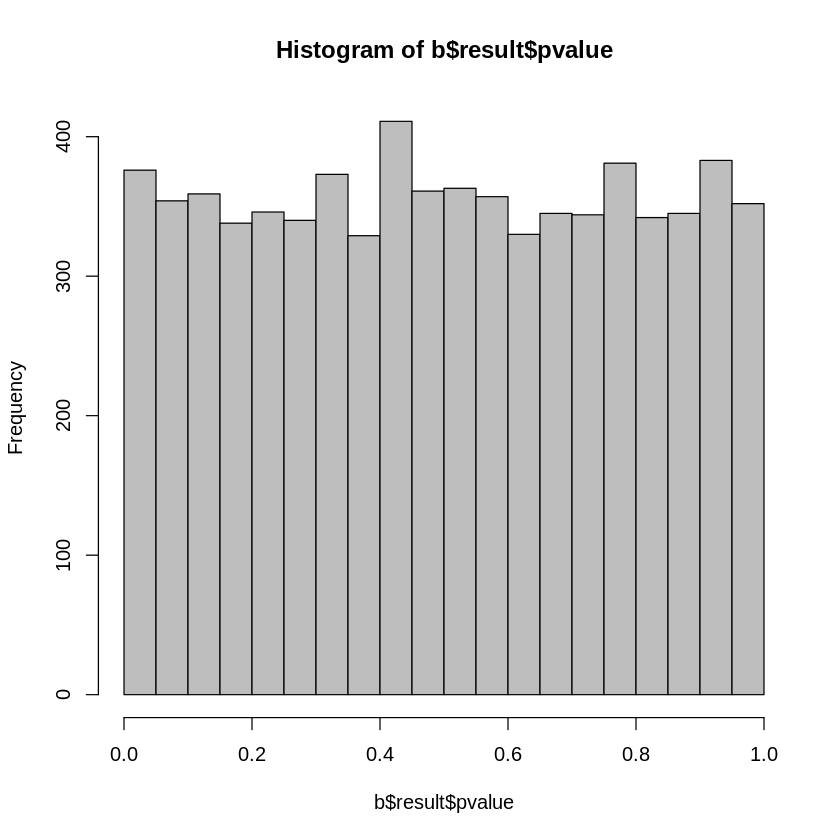

In [42]:
yperm = yperm[-1, ]
b = twilight.pval(golubNorm, yperm[1,], method = "fc", yperm = yperm)
hist(b$result$pvalue, col = "gray", br = 20)

### 예제 15.6

In [43]:
data(exfdr)
exfdr


 Twilight object with
     7129 transcripts
     observed and expected test statistics
     p- and q-values
     local FDR
     bootstrap estimates of local FDR

 Bootstrap estimate of percentage of non-induced
 genes with lower and upper 95% CI:
       pi0 lower.pi0 upper.pi0
 0.6263987   0.59279 0.6568944

 Function call:
 Test: fc. Paired: FALSE. Number of permutations: 1000. Balanced: FALSE. 
 Function twilight used lambda = 0.02 

In [44]:
exfdr$result[1:5, 6:9]

,fdr,mean.fdr,lower.fdr,upper.fdr
,<dbl>,<dbl>,<dbl>,<dbl>
M84526_at,0.01024130,0.01015424,0.007309932,0.01307063
M27891_at,0.01024240,0.01015535,0.007311074,0.01307174
M89957_at,0.01024351,0.01015646,0.007312216,0.01307286
X82240_rna1_at,0.01024461,0.01015756,0.007313358,0.01307398
U89922_s_at,0.01024571,0.01015867,0.007314500,0.01307509


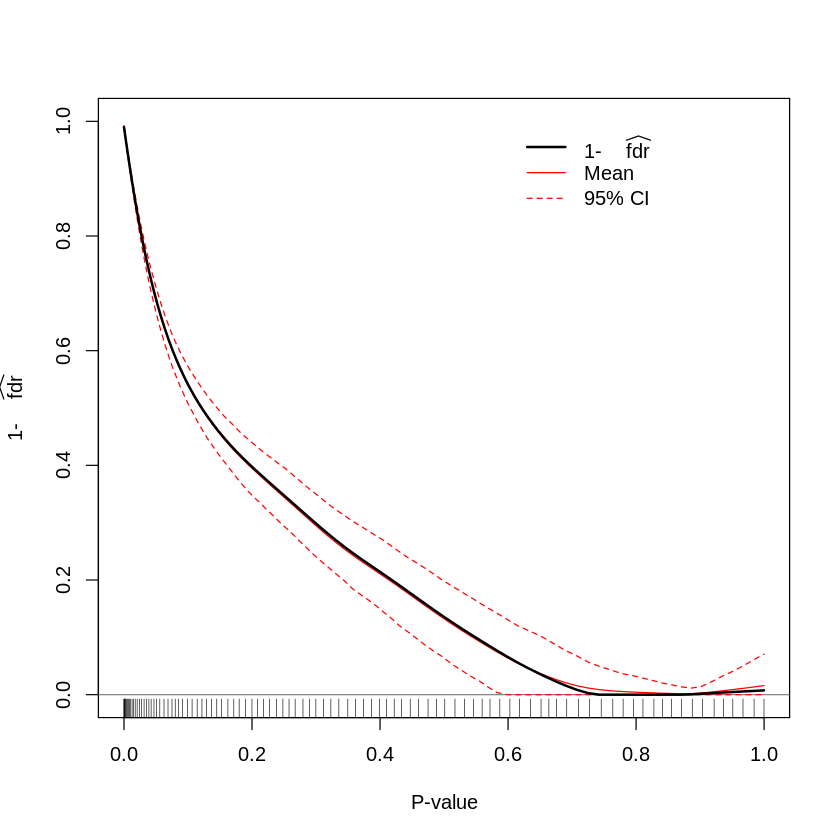

In [45]:
plot(exfdr, which = "fdr", grayscale = F, legend = T)

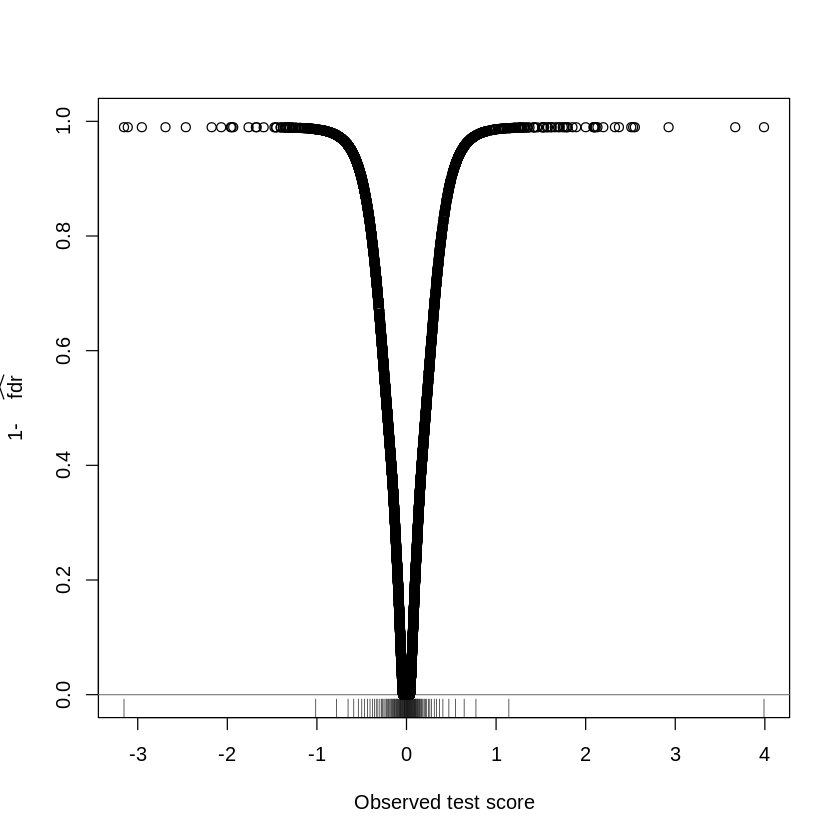

In [46]:
plot(exfdr, which = "volcano")

### 15.4.5 이진벡터의 순열 열거

In [47]:
x = c(rep(0, 2), rep(1, 3))
x

[1] 0 0 1 1 1

In [48]:
twilight.combi(x, pin = FALSE, bin = FALSE)

0,0,1,1,1
0,1,0,1,1
0,1,1,0,1
0,1,1,1,0
1,0,0,1,1
1,0,1,0,1
1,0,1,1,0
1,1,0,0,1
1,1,0,1,0
1,1,1,0,0


In [50]:
twilight.combi(x, pin = FALSE, bin = TRUE)

0,0,1,1,1
0,1,0,1,1
0,1,1,0,1
0,1,1,1,0
1,0,0,1,1
1,0,1,0,1
1,0,1,1,0


In [51]:
y = c(rep(0, 4), rep(1, 4))
y

[1] 0 0 0 0 1 1 1 1

In [52]:
twilight.combi(y, pin = TRUE, bin = FALSE)

0,0,0,0,1,1,1,1
0,0,0,1,1,1,1,0
0,0,1,0,1,1,0,1
0,1,0,0,1,0,1,1
1,0,0,0,0,1,1,1
0,0,1,1,1,1,0,0
0,1,0,1,1,0,1,0
0,1,1,0,1,0,0,1


In [53]:
twilight.combi(y, pin = TRUE, bin = TRUE)

0,0,0,0,1,1,1,1
0,0,1,1,1,1,0,0
0,1,0,1,1,0,1,0
0,1,1,0,1,0,0,1


In [54]:
twilight.permute.pair(y, 7, bal = TRUE)

0,0,0,0,1,1,1,1
0,0,1,1,1,1,0,0
0,1,1,0,1,0,0,1
0,0,1,1,1,1,0,0
0,0,1,1,1,1,0,0
0,0,1,1,1,1,0,0
0,1,1,0,1,0,0,1


## 15.5 {siggenes} 패키지
### 예제 15.7

In [55]:
if(!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("siggenes")
BiocManager::install("siggenes")
library(siggenes)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.21), R 4.3.1 (2023-06-16)

Installing package(s) 'siggenes'

also installing the dependencies ‘multtest’, ‘scrime’


Old packages: 'bit', 'curl', 'dbplyr', 'devtools', 'digest', 'gert', 'highr',
  'isoband', 'pkgload', 'readxl', 'roxygen2', 'rstudioapi', 'testthat',
  'tidyverse', 'whisker', 'xml2', 'boot', 'foreign', 'KernSmooth', 'Matrix',
  'mgcv'

Loading required package: multtest



In [56]:
data(golub)
sam.out = sam(golub, golub.cl, rand = 123, gene.names = golub.gnames[, 3])
sam.out

SAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
   Delta    p0   False Called      FDR
1    0.1 0.512 2427.12   2738 0.453563
2    0.7 0.512  266.46   1225 0.111295
3    1.2 0.512   23.73    589 0.020614
4    1.8 0.512    0.98    205 0.002446
5    2.4 0.512    0.05     75 0.000341
6    3.0 0.512       0     12        0
7    3.5 0.512       0      5        0
8    4.1 0.512       0      2        0
9    4.7 0.512       0      2        0
10   5.2 0.512       0      2        0

In [57]:
print(sam.out, seq(1.5, 2.4, 0.1))

SAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
   Delta    p0 False Called      FDR
1    1.5 0.512  4.97    354 0.007183
2    1.6 0.512  2.93    286 0.005242
3    1.7 0.512  1.90    257 0.003783
4    1.8 0.512  0.98    205 0.002446
5    1.9 0.512  0.63    182 0.001771
6    2.0 0.512  0.39    152 0.001313
7    2.1 0.512  0.22    127 0.000886
8    2.2 0.512  0.16    110 0.000744
9    2.3 0.512  0.08     98 0.000418
10   2.4 0.512  0.05     75 0.000341


To obtain a SAM plot, delta has to be specified in plot(object,delta,...). 


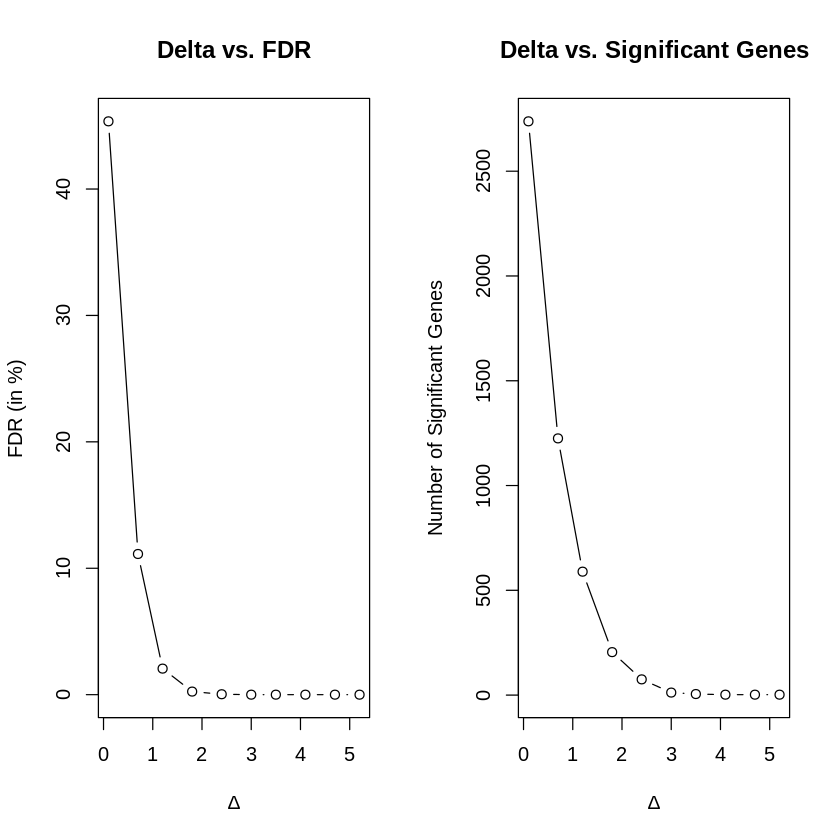

In [58]:
plot(sam.out)

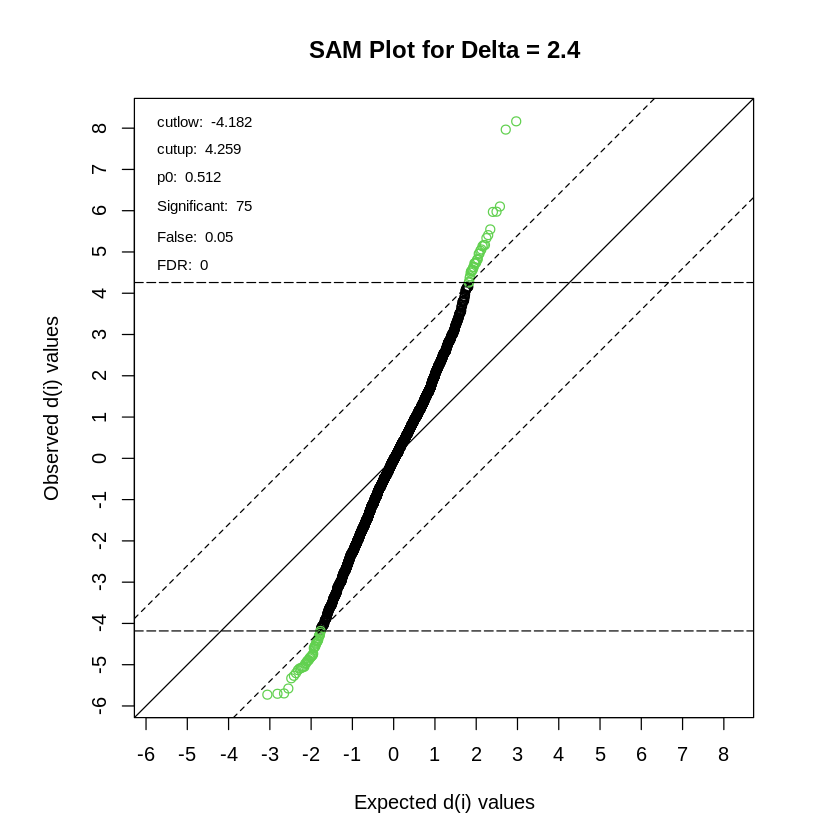

In [59]:
plot(sam.out, 2.4)
identify(sam.out)

In [60]:
sum.sam.out = summary(sam.out, 3.3)
sum.sam.out

SAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
s0 = 0.0584  (The 0 % quantile of the s values.) 
 
 Number of permutations: 100  

 MEAN number of falsely called variables is computed.

Delta: 3.3
cutlow: -Inf
cutup: 5.971
p0: 0.512
Identified Genes: 5
Falsely Called Genes: 0
FDR: 0


Identified Genes (using Delta = 3.3):

   Row d.value stdev rawp q.value R.fold        Name
1  829    8.17 0.296    0       0   7.42   M27891_at
2 2124    7.96 0.178    0       0   3.68   X95735_at
3 2600    6.10 0.191    0       0   2.87 L09209_s_at
4 2664    5.98 0.392    0       0   6.46 Y00787_s_at
5  766    5.97 0.173    0       0   2.61   M16038_at

In [61]:
print(sum.sam.out, varNames = "Proteins")

SAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
s0 = 0.0584  (The 0 % quantile of the s values.) 
 
 Number of permutations: 100  

 MEAN number of falsely called variables is computed.

Delta: 3.3
cutlow: -Inf
cutup: 5.971
p0: 0.512
Identified Proteins: 5
Falsely Called Proteins: 0
FDR: 0


Identified Proteins (using Delta = 3.3):

   Row d.value stdev rawp q.value R.fold        Name
1  829    8.17 0.296    0       0   7.42   M27891_at
2 2124    7.96 0.178    0       0   3.68   X95735_at
3 2600    6.10 0.191    0       0   2.87 L09209_s_at
4 2664    5.98 0.392    0       0   6.46 Y00787_s_at
5  766    5.97 0.173    0       0   2.61   M16038_at


In [62]:
sum.sam.out@row.sig.genes

M16038_at   M27891_at   X95735_at L09209_s_at Y00787_s_at 
        766         829        2124        2600        2664

In [63]:
sum.sam.out@mat.fdr

,Delta,p0,False,Called,FDR,cutlow,cutup,j2,j1
1,3.3,0.511658,0,5,0,-Inf,5.970848,0,3047


In [64]:
sum.sam.out@mat.sig

,Row,d.value,stdev,rawp,q.value,R.fold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M27891_at,829,8.165222,0.2958251,0,0,7.422684
X95735_at,2124,7.964784,0.1778697,0,0,3.684479
L09209_s_at,2600,6.102371,0.1911219,0,0,2.872660
Y00787_s_at,2664,5.975750,0.3918749,0,0,6.455137
M16038_at,766,5.970848,0.1731333,0,0,2.606597


In [65]:
list.siggenes(sam.out, 3.3)

[1] "M27891_at"   "X95735_at"   "L09209_s_at" "Y00787_s_at" "M16038_at"

In [66]:
findDelta(sam.out, fdr = 0.05)

Warning message in findNumber(object, fdr, delta = delta, isSAM = isSAM, prec = prec, :
“Since the FDR does not always decrease with increasing delta
the results of findDelta should be considered with caution.”


The threshold seems to be at 
     Delta Called      FDR
5 0.950385    872 0.050127
6 0.950386    871 0.049967


In [67]:
findDelta(sam.out, genes = 200)

     Delta Called    FDR
3 1.830469    200 0.0022


### 예제 15.8

In [68]:
find.out = find.a0(golub, golub.cl, rand = 123)
find.out

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Selection Criterion: Posterior >= 0.9 

      a0 Quantile Number    FDR
1 0.0000        -    634 0.0309
2 0.0584        0    622 0.0310
3 0.1183      0.2    584 0.0321
4 0.1456      0.4    573 0.0327
5 0.1789      0.6    560 0.0332
6 0.2270      0.8    543 0.0342
7 0.6528        1    461 0.0391

Suggested Choice for a0: 0


In [69]:
print(find.out, 0.95)

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Selection Criterion: Posterior >= 0.95 

      a0 Quantile Number    FDR
1 0.0000        -    466 0.0156
2 0.0584        0    457 0.0157
3 0.1183      0.2    423 0.0164
4 0.1456      0.4    411 0.0166
5 0.1789      0.6    398 0.0169
6 0.2270      0.8    381 0.0175
7 0.6528        1    300 0.0204

Suggested Choice for a0: 0



Warning message:
“Some of the logit posterior probabilites are Inf. These probabilities are not plotted.”


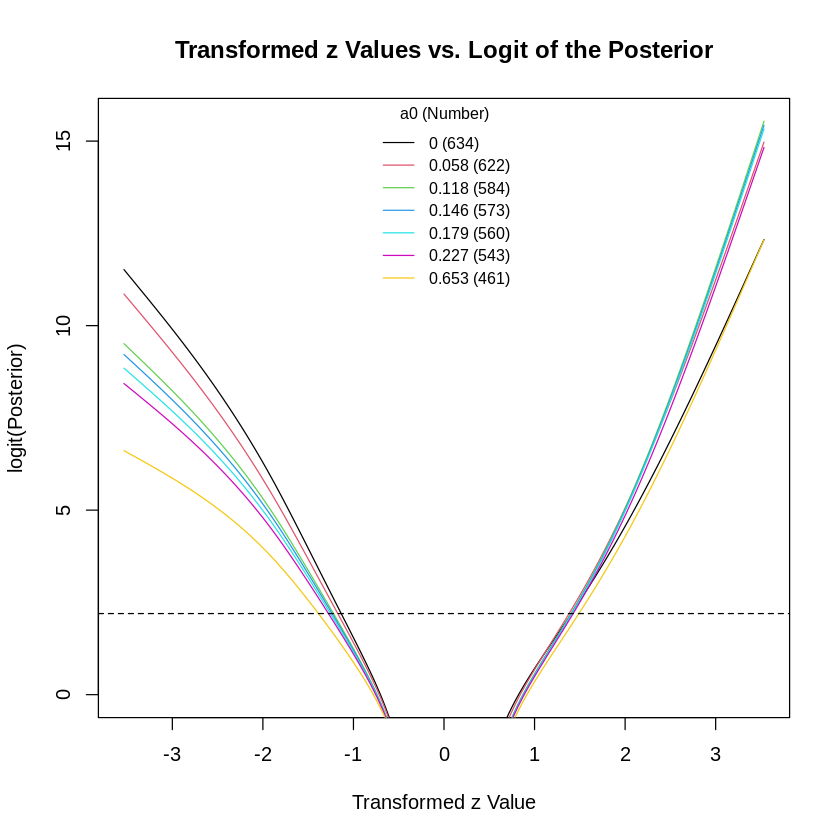

In [70]:
plot(find.out)

In [71]:
print(find.out, 0.9)

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Selection Criterion: Posterior >= 0.9 

      a0 Quantile Number    FDR
1 0.0000        -    634 0.0309
2 0.0584        0    622 0.0310
3 0.1183      0.2    584 0.0321
4 0.1456      0.4    573 0.0327
5 0.1789      0.6    560 0.0332
6 0.2270      0.8    543 0.0342
7 0.6528        1    461 0.0391

Suggested Choice for a0: 0



In [72]:
ebam(find.out)

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Fudge Factor:  a0 = 0 

  Delta Number    FDR
1   0.9    576 0.0295

In [73]:
ebam(find.out, which.a0 = 2)

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Fudge Factor:  a0 = 0.0584 

  Delta Number   FDR
1   0.9    700 0.032

In [74]:
ebam(golub, golub.cl, a0 = 0, fast = TRUE, rand = 123)

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Fudge Factor:  a0 = 0 

  Delta Number    FDR
1   0.9    576 0.0295

In [75]:
(ebam.out = ebam(golub, golub.cl, a0 = 0, fast = FALSE, rand = 123))

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Fudge Factor:  a0 = 0 

  Delta Number    FDR
1   0.9    702 0.0303

In [76]:
print(ebam.out, seq(0.91, 0.99, 0.01))

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Fudge Factor:  a0 = 0 

  Delta Number    FDR
1  0.91    673 0.0268
2  0.92    644 0.0239
3  0.93    610 0.0211
4  0.94    569 0.0188
5  0.95    531 0.0157
6  0.96    483 0.0126
7  0.97    430 0.0095
8  0.98    361 0.0066
9  0.99    251 0.0038


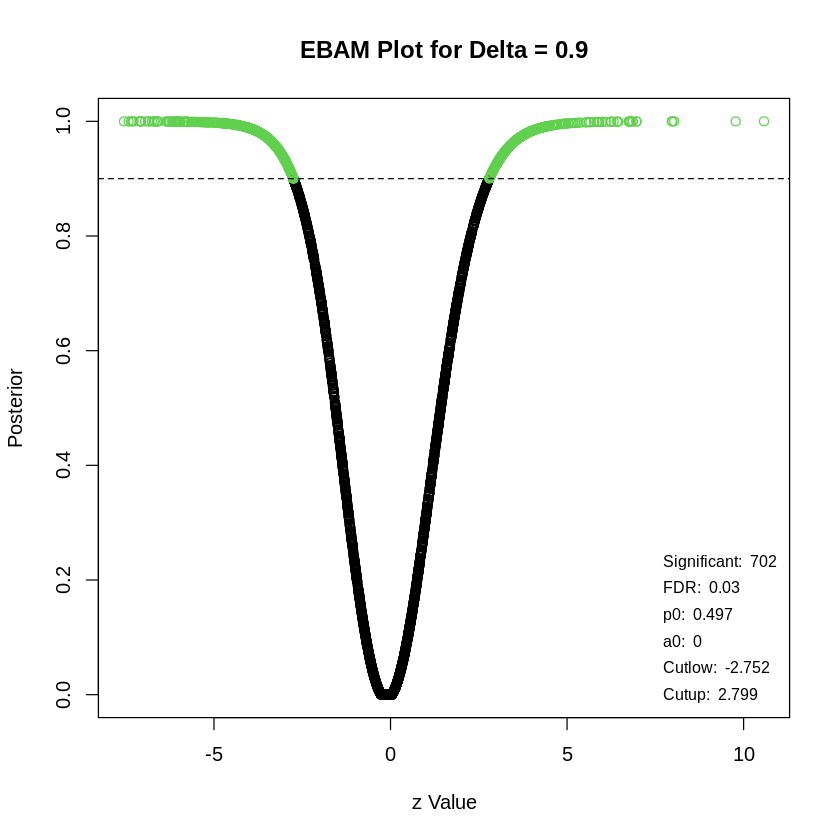

In [77]:
plot(ebam.out, 0.9)

In [78]:
summary(ebam.out, 0.99997)

EBAM Analysis for the Two-Class Unpaired Case Assuming Unequal Variances 
 
Delta: 0.99997
a0: 0
p0: 0.4974
Cutlow: -Inf
Cutup: 9.7758
Identified Genes: 2
Estimated FDR: 0


Identified Genes (posterior >= 0.99997):

   Row z.value posterior local.fdr
1 2124  10.578         1 3.718e-06
2  829   9.776         1 9.356e-06

In [79]:
ebam(golub, golub.cl, a0 = 0, var.equal = TRUE, rand = 123)

EBAM Analysis for the Two-Class Unpaired Case Assuming Equal Variances 
 
Fudge Factor:  a0 = 0 

  Delta Number    FDR
1   0.9    699 0.0297

In [80]:
ebam(golub, golub.cl, method = wilc.ebam, rand = 123)

EBAM Analysis for the Two-Class Unpaired Case Using Wilcoxon Rank Sums 
 
  Delta Number    FDR
1   0.9    736 0.0273